##Importing necessary libraries.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
path= ('/content/drive/MyDrive/Data for analysis/Diwali Sales Data.csv')

In [32]:
data= pd.read_csv(path, encoding= 'unicode_escape')

##Data Exploration Using Graphs/Plots and data cleaning.

In [33]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [34]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [36]:
pd.isnull(data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [37]:
data.dropna(inplace=True)

In [38]:
data['Amount']= data['Amount'].astype('int')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [40]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


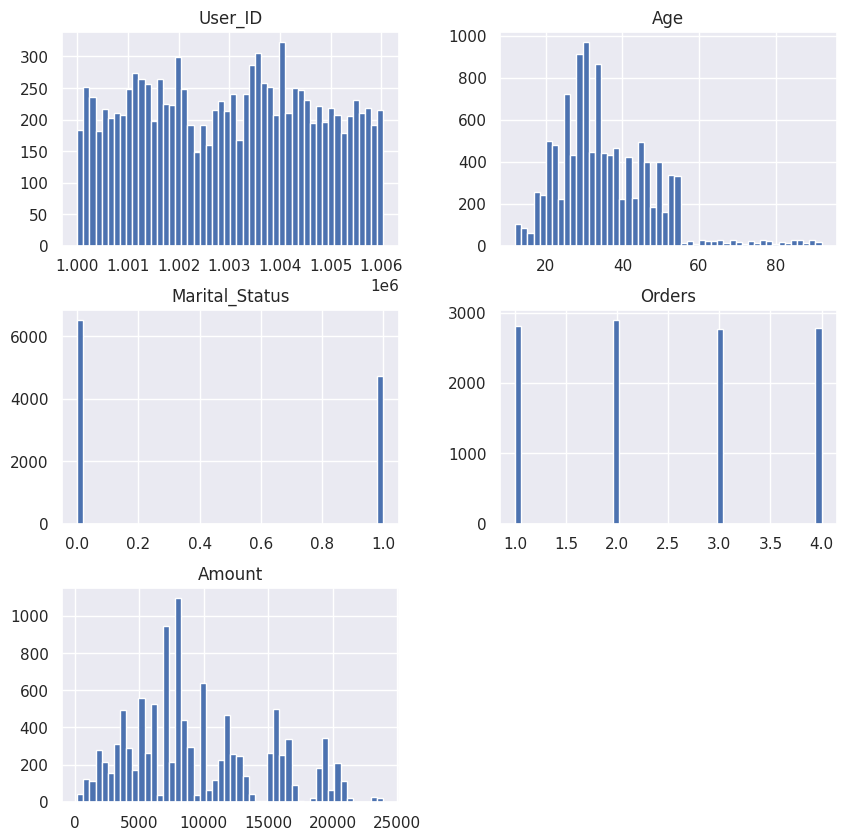

In [41]:
data.hist(figsize=(10,10), bins=50)
plt.show()

<Axes: xlabel='Amount', ylabel='Count'>

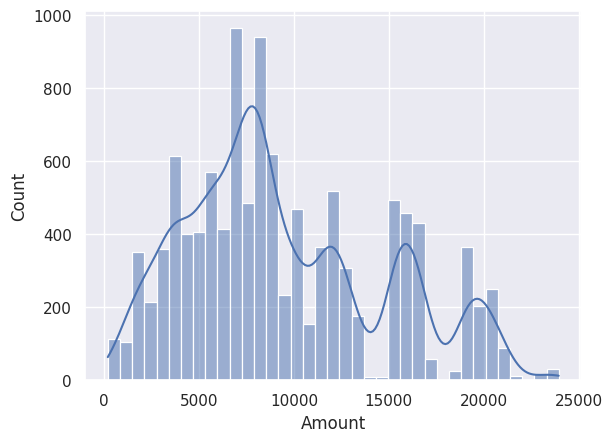

In [42]:
sns.histplot(data=data, x='Amount', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

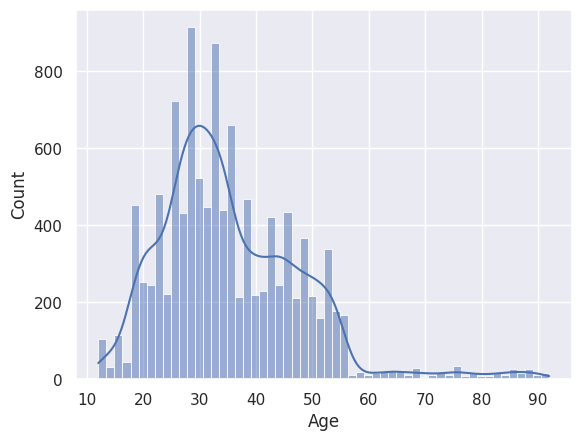

In [43]:
sns.histplot(data=data, x='Age', kde=True)

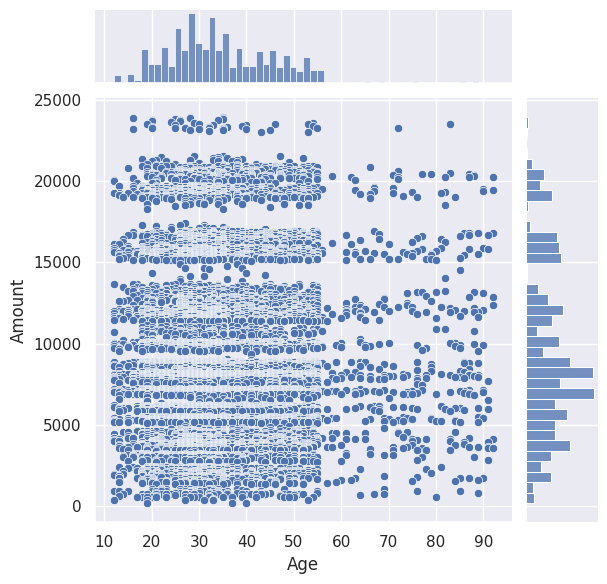

In [44]:
sns.jointplot(data=data, y='Amount', x='Age')

In [45]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Orders', ylabel='Age'>,
        <Axes: xlabel='Amount', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Orders'>,
        <Axes: xlabel='Orders', ylabel='Orders'>,
        <Axes: xlabel='Amount', ylabel='Orders'>],
       [<Axes: xlabel='Age', ylabel='Amount'>,
        <Axes: xlabel='Orders', ylabel='Amount'>,
        <Axes: xlabel='Amount', ylabel='Amount'>]], dtype=object)

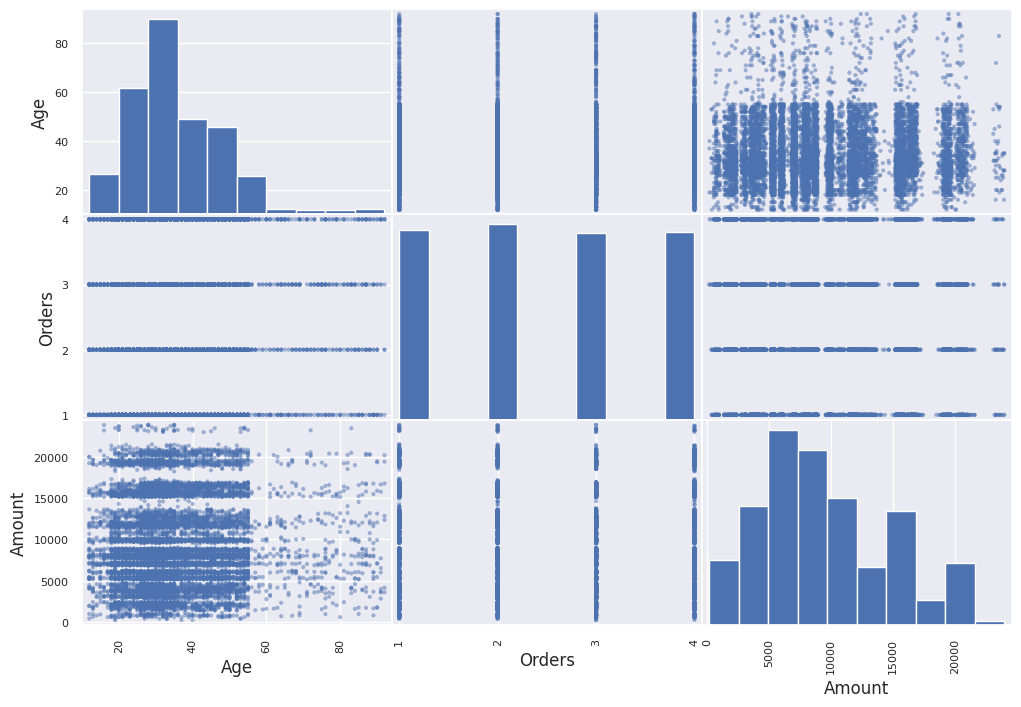

In [46]:
attributes=['Age', 'Orders', 'Amount']
scatter_matrix(data[attributes], figsize=(12,8))

In [47]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Amount'>

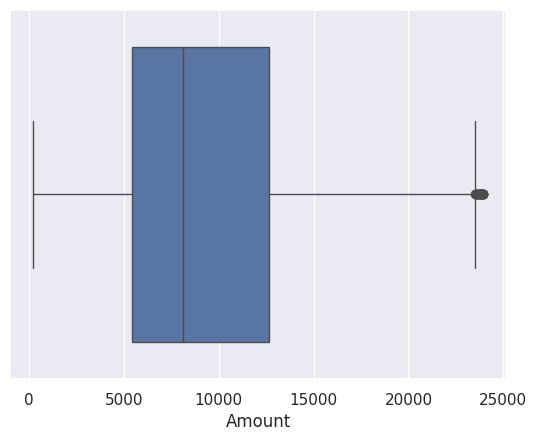

In [48]:
sns.boxplot(data=data, x='Amount')

## I want to make the cluster of customers based on the Age and Amount Spent. So,

In [49]:
first_insight=data.iloc[:,[5,12]]

In [50]:
print(first_insight)

       Age  Amount
0       28   23952
1       35   23934
2       35   23924
3       16   23912
4       28   23877
...    ...     ...
11246   19     370
11247   33     367
11248   40     213
11249   37     206
11250   19     188

[11239 rows x 2 columns]


##Time to choose the total number of clusters we need. We will use WCSS (Within Clusters Sum of Squares) method.

In [51]:
from sklearn.cluster import KMeans

In [52]:
wcss= []

for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(first_insight)
  wcss.append(kmeans.inertia_)

##Now we will use elbow graph for the selection of no. of clusters.

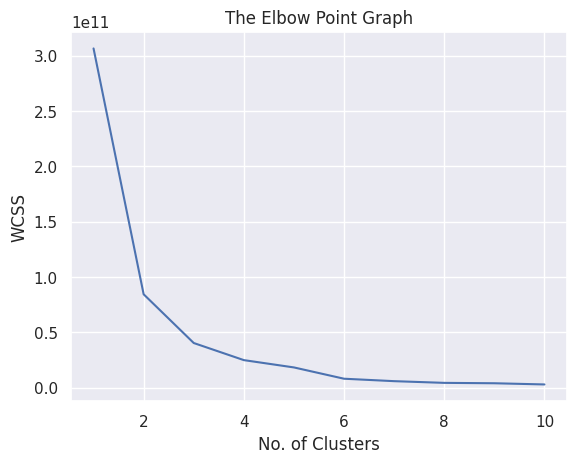

In [53]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

##When Optimum Number of Clusters= 4

## Now, Model Training.

In [54]:
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=0)
Y= kmeans.fit_predict(first_insight)
print(Y)

[1 1 1 ... 2 2 2]


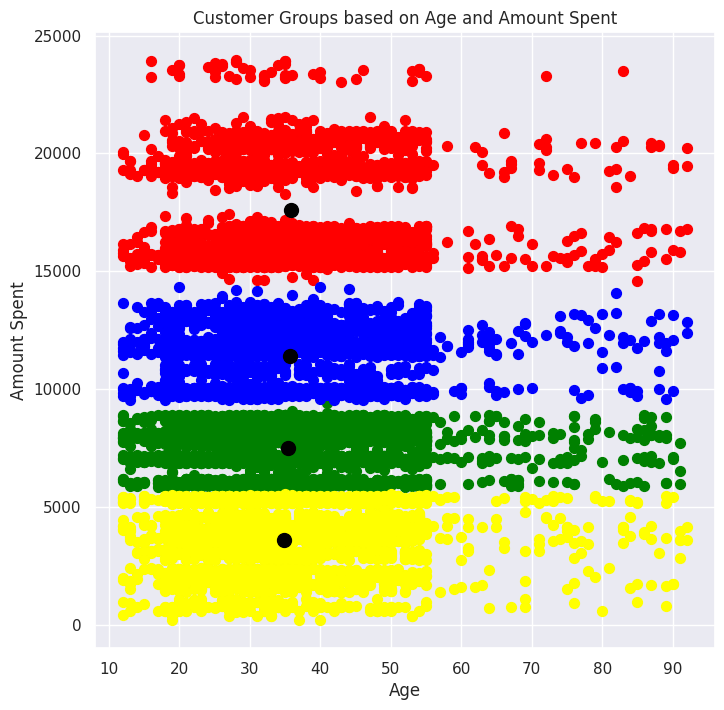

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(first_insight.loc[Y==0, 'Age'], first_insight.loc[Y==0, 'Amount'], s=50, c='green', label='Cluster 1')
plt.scatter(first_insight.loc[Y==1, 'Age'], first_insight.loc[Y==1, 'Amount'], s=50, c='red', label='Cluster 2')
plt.scatter(first_insight.loc[Y==2, 'Age'], first_insight.loc[Y==2, 'Amount'], s=50, c='yellow', label='Cluster 3')
plt.scatter(first_insight.loc[Y==3, 'Age'], first_insight.loc[Y==3, 'Amount'], s=50, c='blue', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids') #This Line is for thr centroid.
plt.title('Customer Groups based on Age and Amount Spent')
plt.xlabel('Age')
plt.ylabel('Amount Spent')
plt.show()

Analysis and Findings= It can be observed that the age customers with range 10-55 have the highest number of purchasing power. Whereas,55-90 seems weak. Amount spent is not really affected by the age that much.